<a href="https://colab.research.google.com/github/shuvosonjoy/image_classification_using_CNN/blob/main/catVdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:09<00:00, 76.5MB/s]
100% 1.06G/1.06G [00:09<00:00, 119MB/s] 


In [ ]:
import zipfile
ref= zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
ref.extractall('/content')
ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
#basically generators divides dataset into batches
#a little portion of dataset(batch) loads on ram & after finishing excecution another batch loaded on ram.

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 107ms/step - loss: 1.3162 - accuracy: 0.6075 - val_loss: 0.6080 - val_accuracy: 0.6702
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5608 - accuracy: 0.7165 - val_loss: 0.5925 - val_accuracy: 0.7348
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4819 - accuracy: 0.7697 - val_loss: 0.5246 - val_accuracy: 0.7452
Epoch 4/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4150 - accuracy: 0.8121 - val_loss: 0.4414 - val_accuracy: 0.7960
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3624 - accuracy: 0.8406 - val_loss: 0.5551 - val_accuracy: 0.7388
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3163 - accuracy: 0.8619 - val_loss: 0.5456 - val_accuracy: 0.7864
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2289 - accuracy: 0.9055 - val_loss: 0.5284 - val_ac

In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
test_img = cv2.imread('/content/testdog.jpg')

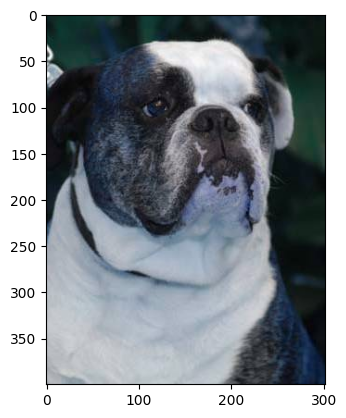

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(400, 302, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)